In [807]:
#Import the libraries
import time
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
from textblob import TextBlob
from sklearn import metrics
from langdetect import detect
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import warnings

In [808]:
#Ignore warnings
warnings.filterwarnings("ignore")

In [861]:
#Scraping the comments from Youtube videos
pd.set_option('display.max_colwidth', 1000)

with Chrome() as driver:
    wait = WebDriverWait(driver, 100)
    driver.get("https://www.youtube.com/watch?v=J1xSK3mPZ9k")

    for item in range(5): # by increasing the highest range you can get more content
        wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END)
        time.sleep(3)

    comments = []
    for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#comment #content-text"))):
        comments.append(comment.text)

    # Convert the comments list into a DataFrame
    df = pd.DataFrame({'comments': comments})

In [810]:
# Print the DataFrame
df.head(5)

,comments
0,Let me retaliate by saying that when the dalai lama said 'suck my toungue ' he actually meant 'eat my toungue' which is a playful way an elder responds to its younger when he asks for something..like a candy..we say it in situations like 'God you are asking for so much..now u wanna eat my toungue too..' our dalai lama isn't really that proficient in English as it was self learned and it being our second language..it was clearly a misunderstanding and misinterpretation by all the people.. if he said eat my toungue rather than the word suck..it wouldnt have sound that wrong.. please try to understand his intentions without immediately jumping on conclusions and check the complete video first.. video by jigjag too should be checked out for detailed understanding..please don't let 15 sec edited video manipulate you..
1,"before airing the news, the fact check is must for the media."
2,"Tibetans told VICE World News that the meaning of this common expression used to tease and teach children is completely lost in cultural interpretation and its English translation. The correct phrase in Tibetan for this joke is “Che le sa”, which roughly translates to “Eat my tongue.” English is the Dalai Lama’s second language and Indian news outlets have previously reported that the leader speaks in broken English at public events."
3,"Boycott NDTV i am frustrate of your fake news,if you want to show the video than put full video why did you put the blur face with dramatic music background to look bad"
4,I wish someone would show the full video where he kept holding on to the child and hugging.


In [811]:
df.shape

(100, 1)

In [812]:
#Convert the comments gathered into a CSV file
df.to_csv('comments8.csv', index=False)

In [813]:
#Measure the degree to which the text expresses a positive or negative sentiment
df['polarity'] = df['comments'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [814]:
#Shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)

In [815]:
df['pol_cat']  = 0

In [816]:
#Continuous to categorical conversion
df['pol_cat'][df.polarity > 0] = 1
df['pol_cat'][df.polarity <= 0] = -1

In [817]:
df.head()

,comments,polarity,pol_cat
0,"There is absolutely NO excuse for what was done to this child. It's sick, vile, disgusting and evil. Period!!!! This LITERALLY makes me nauseous!! He would do that to my child ONCE and it wouldn't ever happen again. That poor kid.",-0.617857,-1
1,I stand for his holiness Dalai Lama,0.000000,-1
2,"तिब्बती संस्कृति में, हम तब भी सॉरी बोलते हैं, जब हमने कुछ भी गलत नहीं किया, सिर्फ दूसरे व्यक्ति को शांत करने के लिए, क्योंकि सॉरी बोलने में कुछ नहीं जाटा। जब दलाई लामा ने माफी मांगी तो उन्होंने अपनी विनम्रता और विनम्रता के कारण हमारी नकारात्मक सोच के कारण ऐसा किया; और उसके कार्यों के कारण नहीं। हां, वे शब्द के चयन में कमजोर थे लेकिन अंग्रेजी उनकी मूल भाषा नहीं है।",0.000000,-1
3,I stand with Dalai Lama,0.000000,-1
4,"that Dalai lama tongue action is disturbing. It shows who he really is on the inside. Religion, and freedom eh? Do you really think this is his first time ?",0.050000,1


In [818]:
df['pol_cat'].value_counts()

-1    53
 1    47
Name: pol_cat, dtype: int64

In [819]:
#Create separate dataframes for Negative,Positive & Neutral comments
data_pos = df[df['pol_cat'] == 1]
data_pos = data_pos.reset_index(drop = True)

data_neg = df[df['pol_cat'] == -1]
data_neg = data_neg.reset_index(drop = True)

In [820]:
#Check the positive comments
data_pos.head()

,comments,polarity,pol_cat
0,"that Dalai lama tongue action is disturbing. It shows who he really is on the inside. Religion, and freedom eh? Do you really think this is his first time ?",0.050000,1
1,Long live his his holiness the 14th Dalai Lama,0.043182,1
2,"AGE OF DISILLUSIONMENT no, it is not normal, nor a cultural tradition ....simply, sexual abuse",0.175000,1
3,"I ask the media to show the full unedited video before moving thier sharp tongue to misguide others. His Holiness the Dalai Lama is always open, transparent and crystal clear in his every move. He is free from all the negativities and has no any guilt like we ordinary people have. The very purpose of his showing grandfatherly love and affection to the boy when the kid asked; ""Can I hug you"", is to show toxic people not to use sharp tongue to misguide innocent people.",0.155000,1
4,Right now......who do I trust?,0.285714,1


In [821]:
data_pos.shape

(47, 3)

In [822]:
#Check the positive comments
data_neg.head()

,comments,polarity,pol_cat
0,"There is absolutely NO excuse for what was done to this child. It's sick, vile, disgusting and evil. Period!!!! This LITERALLY makes me nauseous!! He would do that to my child ONCE and it wouldn't ever happen again. That poor kid.",-0.617857,-1
1,I stand for his holiness Dalai Lama,0.000000,-1
2,"तिब्बती संस्कृति में, हम तब भी सॉरी बोलते हैं, जब हमने कुछ भी गलत नहीं किया, सिर्फ दूसरे व्यक्ति को शांत करने के लिए, क्योंकि सॉरी बोलने में कुछ नहीं जाटा। जब दलाई लामा ने माफी मांगी तो उन्होंने अपनी विनम्रता और विनम्रता के कारण हमारी नकारात्मक सोच के कारण ऐसा किया; और उसके कार्यों के कारण नहीं। हां, वे शब्द के चयन में कमजोर थे लेकिन अंग्रेजी उनकी मूल भाषा नहीं है।",0.000000,-1
3,I stand with Dalai Lama,0.000000,-1
4,Don’t simply imply your society guru’s act in somebody guru,0.000000,-1


In [823]:
data_neg.shape

(53, 3)

-1    53
 1    47
Name: pol_cat, dtype: int64

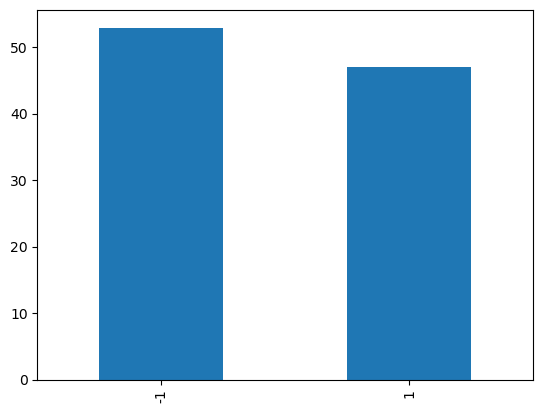

In [824]:
#Distribution of positive(+1) and negative(-1) comments
df.pol_cat.value_counts().plot.bar()
df.pol_cat.value_counts()

In [825]:
#Data pre-processing, convert comments to lowercase characters
df['comments'] = df['comments'].str.lower()

In [826]:
#Remove unecessary spaces
df['comments'].str.strip()

0                                                                                                                                                                                                                                                                                                                                                                     there is absolutely no excuse for what was done to this child. it's sick, vile, disgusting and evil. period!!!! this literally makes me nauseous!! he would do that to my child once and it wouldn't ever happen again. that poor kid.
1                                                                                                                                                                                                                                                                                                                                                                                                                          

In [827]:
# Define a function to clean the English comments, remove other language comments
def clean_text(text):
    # Remove any non-ASCII characters
    text = text.encode('ascii', 'ignore').decode('ascii')
    # Remove any non-alphanumeric characters and convert to lowercase
    text = ''.join(e for e in text if e.isalnum() or e.isspace())
    text = text.lower()
    return text


# Use the langdetect library to detect the language of each comment
df['language'] = df['comments'].apply(lambda x: detect(x))

# Filter the dataframe to keep only the comments that are in English
df = df[df['language'] == 'en']

# Clean the English comments and store them in a new column called 'clean_comments'
df['clean_comments'] = df['comments'].apply(clean_text)

# Print the cleaned English comments
df['clean_comments'].head()


0    there is absolutely no excuse for what was done to this child its sick vile disgusting and evil period this literally makes me nauseous he would do that to my child once and it wouldnt ever happen again that poor kid
1                                                                                                                                                                                        i stand for his holiness dalai lama 
4                                                                    that dalai lama tongue action is disturbing it shows who he really is on the inside  religion and freedom eh do you really think this is his first time 
5                                                                                                                                                                              long live his his holiness the 14th dalai lama
6                                                                                                               

In [828]:
#Compare original comments and cleaned comments
df.head()

,comments,polarity,pol_cat,language,clean_comments
0,"there is absolutely no excuse for what was done to this child. it's sick, vile, disgusting and evil. period!!!! this literally makes me nauseous!! he would do that to my child once and it wouldn't ever happen again. that poor kid.",-0.617857,-1,en,there is absolutely no excuse for what was done to this child its sick vile disgusting and evil period this literally makes me nauseous he would do that to my child once and it wouldnt ever happen again that poor kid
1,i stand for his holiness dalai lama,0.000000,-1,en,i stand for his holiness dalai lama
4,"that dalai lama tongue action is disturbing. it shows who he really is on the inside. religion, and freedom eh? do you really think this is his first time ?",0.050000,1,en,that dalai lama tongue action is disturbing it shows who he really is on the inside religion and freedom eh do you really think this is his first time
5,long live his his holiness the 14th dalai lama,0.043182,1,en,long live his his holiness the 14th dalai lama
6,don’t simply imply your society guru’s act in somebody guru,0.000000,-1,en,dont simply imply your society gurus act in somebody guru


In [829]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 99
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   comments        90 non-null     object 
 1   polarity        90 non-null     float64
 2   pol_cat         90 non-null     int64  
 3   language        90 non-null     object 
 4   clean_comments  90 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 4.2+ KB


In [830]:
df.describe()

,polarity,pol_cat
count,90.000000,90.000000
mean,0.022334,-0.022222
std,0.258368,1.005354
min,-1.000000,-1.000000
25%,-0.042560,-1.000000
50%,0.000000,-1.000000
75%,0.170313,1.000000
max,0.527778,1.000000


In [831]:
#df['clean_comments'].str.strip()

In [832]:
#Download stopwords package
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\neera\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [833]:
#Download punkt package
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\neera\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [834]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [835]:
stop_words = set(stopwords.words('english'))

In [836]:
df['clean_comments'] = df['clean_comments'].str.strip()

In [837]:
#View the transformed data
df.head(8)

,comments,polarity,pol_cat,language,clean_comments
0,"there is absolutely no excuse for what was done to this child. it's sick, vile, disgusting and evil. period!!!! this literally makes me nauseous!! he would do that to my child once and it wouldn't ever happen again. that poor kid.",-0.617857,-1,en,there is absolutely no excuse for what was done to this child its sick vile disgusting and evil period this literally makes me nauseous he would do that to my child once and it wouldnt ever happen again that poor kid
1,i stand for his holiness dalai lama,0.000000,-1,en,i stand for his holiness dalai lama
4,"that dalai lama tongue action is disturbing. it shows who he really is on the inside. religion, and freedom eh? do you really think this is his first time ?",0.050000,1,en,that dalai lama tongue action is disturbing it shows who he really is on the inside religion and freedom eh do you really think this is his first time
5,long live his his holiness the 14th dalai lama,0.043182,1,en,long live his his holiness the 14th dalai lama
6,don’t simply imply your society guru’s act in somebody guru,0.000000,-1,en,dont simply imply your society gurus act in somebody guru
7,"before airing the news, the fact check is must for the media.",0.000000,-1,en,before airing the news the fact check is must for the media
8,"age of disillusionment no, it is not normal, nor a cultural tradition ....simply, sexual abuse",0.175000,1,en,age of disillusionment no it is not normal nor a cultural tradition simply sexual abuse
9,i stand with his holiness,0.000000,-1,en,i stand with his holiness


In [838]:
#Define function to remove stopwords
def remove_stopwords(line):
    word_tokens = word_tokenize(line)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return " ".join(filtered_sentence)

In [839]:
df['stop_comments'] = df['clean_comments'].apply(lambda x : remove_stopwords(x))

In [840]:
df.head()

,comments,polarity,pol_cat,language,clean_comments,stop_comments
0,"there is absolutely no excuse for what was done to this child. it's sick, vile, disgusting and evil. period!!!! this literally makes me nauseous!! he would do that to my child once and it wouldn't ever happen again. that poor kid.",-0.617857,-1,en,there is absolutely no excuse for what was done to this child its sick vile disgusting and evil period this literally makes me nauseous he would do that to my child once and it wouldnt ever happen again that poor kid,absolutely excuse done child sick vile disgusting evil period literally makes nauseous would child wouldnt ever happen poor kid
1,i stand for his holiness dalai lama,0.000000,-1,en,i stand for his holiness dalai lama,stand holiness dalai lama
4,"that dalai lama tongue action is disturbing. it shows who he really is on the inside. religion, and freedom eh? do you really think this is his first time ?",0.050000,1,en,that dalai lama tongue action is disturbing it shows who he really is on the inside religion and freedom eh do you really think this is his first time,dalai lama tongue action disturbing shows really inside religion freedom eh really think first time
5,long live his his holiness the 14th dalai lama,0.043182,1,en,long live his his holiness the 14th dalai lama,long live holiness 14th dalai lama
6,don’t simply imply your society guru’s act in somebody guru,0.000000,-1,en,dont simply imply your society gurus act in somebody guru,dont simply imply society gurus act somebody guru


In [841]:
#Split the dataset into training and testing data
X_train,X_test,y_train,y_test = train_test_split(df['stop_comments'],df['pol_cat'],test_size = 0.2,random_state = 324)

In [842]:
X_train.shape

(72,)

In [843]:
X_test.shape

(18,)

In [844]:
df['pol_cat'].value_counts()

-1    46
 1    44
Name: pol_cat, dtype: int64

In [845]:
#Use Count Vectorizer to transform the data
vect = CountVectorizer()
tf_train = vect.fit_transform(X_train)
tf_test = vect.transform(X_test)

In [846]:
tf_train.shape

(72, 734)

In [847]:
#Print vocabulary
print(vect.vocabulary_)

{'sinful': 600, 'man': 402, 'like': 379, 'anyone': 35, 'us': 693, 'hell': 295, 'say': 570, 'bad': 55, 'things': 652, 'dalai': 156, 'lama': 364, 'best': 67, 'international': 338, 'figure': 236, 'stay': 627, 'away': 51, 'controversy': 136, 'lost': 394, 'translation': 673, 'eat': 196, 'tongue': 666, 'tibetan': 659, 'phrase': 498, 'che': 105, 'la': 363, 'sa': 566, 'three': 656, 'sides': 594, 'every': 211, 'story': 629, 'came': 94, 'back': 53, 'deleted': 167, 'video': 699, 'seen': 579, 'whole': 714, 'play': 503, 'boy': 82, '45': 7, 'inches': 326, 'times': 662, 'alan': 25, 'watts': 707, 'understood': 685, 'spoke': 621, 'profound': 523, 'truth': 679, 'deeper': 161, 'manner': 404, 'ever': 210, 'find': 238, 'fascinating': 230, 'millions': 420, 'people': 492, 'believe': 65, 'feel': 233, 'great': 273, 'holy': 308, 'ps': 530, 'smoked': 606, 'ton': 665, 'cigarettes': 115, 'definitely': 166, 'wont': 721, 'let': 377, 'go': 266, 'false': 228, 'statement': 626, 'upon': 692, 'holiness': 306, 'wait': 705

In [848]:
vocab = vect.vocabulary_

In [849]:
#Build Logistic model
lr = LogisticRegression()
lr.fit(tf_train,y_train)

LogisticRegression()

In [850]:
#Accuracy score for train data 
lr.score(tf_train,y_train)

1.0

In [851]:
#Accuracy score for test data 
lr.score(tf_test,y_test)

0.7222222222222222

In [852]:
predicted_lr = lr.predict(tf_test) #prediction for Logistic model

In [853]:
#Build Multinomial model
model=MultinomialNB()


In [854]:
#Fit the model
model.fit(tf_train, y_train)

MultinomialNB()

In [855]:
#Accuracy score for train data 
model.score(tf_train,y_train)

0.9722222222222222

In [856]:
#Accuracy score for test data 
model.score(tf_test,y_test)

0.7222222222222222

In [857]:
expected = y_test

In [858]:
predicted_mnb = model.predict(tf_test) #prediction for MultinomialNB model

In [859]:
#Prepare classification report for Multionmial Naive Baye's algorithm
cf_mnb=classification_report(expected, predicted_mnb)
print("Classification Report for Multionmial Naive Baye's algorithm:\n", cf_mnb)


Classification Report for Multionmial Naive Baye's algorithm:
               precision    recall  f1-score   support

          -1       0.62      0.71      0.67         7
           1       0.80      0.73      0.76        11

    accuracy                           0.72        18
   macro avg       0.71      0.72      0.71        18
weighted avg       0.73      0.72      0.72        18



In [860]:
#Prepare classification report for Logistic Regression algorithm
cf_lr=classification_report(expected, predicted_lr)
print("Classification Report for Logistic Regression algorithm:\n", cf_lr)

Classification Report for Logistic Regression algorithm:
               precision    recall  f1-score   support

          -1       0.58      1.00      0.74         7
           1       1.00      0.55      0.71        11

    accuracy                           0.72        18
   macro avg       0.79      0.77      0.72        18
weighted avg       0.84      0.72      0.72        18

